In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 

In [8]:
np.random.seed(101)
tf.set_random_seed(101)

In [9]:
np.random.seed(101)
rand_a = np.random.uniform(0,100,(5,5))
rand_b = np.random.uniform(0,100,(5,1))

### Placeholders

In [10]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

### Operations

In [11]:
add_op = a+b # tf.add(a,b)
mult_op = a*b #tf.multiply(a,b)

### Running Sessions  to create Graphs with Feed Dictionaries

In [12]:
with tf.Session() as sess:
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    
    print('\n')
    
    mult_result = sess.run(mult_op,feed_dict={a:rand_a,b:rand_b})
    print(mult_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


## Neural Network

In [25]:
#Example NN
n_features = 5
n_dense_neurons = 3
tf.set_random_seed(101)

x = tf.placeholder(tf.float32,(None,n_features)) #輸入 
b = tf.Variable(tf.zeros([n_dense_neurons])) #偏移量
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons])) #權重
xW = tf.matmul(x,W) #內積
z = tf.add(xW,b)
a = tf.sigmoid(z)
init = tf.global_variables_initializer()
np.random.seed(101)
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a,feed_dict={x : np.random.random([1,n_features])})
print(layer_out)

[[0.7145067  0.60286885 0.15875666]]


## Network with regression

y = mx + b

y將是y_labels，x是x_data。我們試圖找出最適合我們數據的斜率和截距！

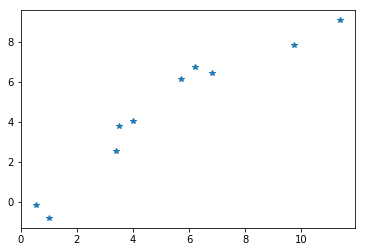

In [26]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
plt.plot(x_data,y_label,'*')

In [29]:
m = tf.Variable(0.39)
b = tf.Variable(0.2)
error = 0
for x,y in zip(x_data,y_label):
    y_hat = m*x + b  #預測值
    error += (y-y_hat)**2 #驗證

In [30]:
x_data

array([ 1.00169059,  0.53200977,  3.40306146,  3.99796492,  3.51426131,
        5.71823833,  6.22306253,  6.82345499,  9.74569417, 11.39644967])

In [31]:
y_label

array([-0.80293901, -0.13820459,  2.53286749,  4.02031161,  3.77316093,
        6.11147454,  6.72026909,  6.42323139,  7.8024966 ,  9.06090228])

### Optimizer

In [32]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

### Initialize Variables & Create Session and Run!

In [33]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    
    sess.run(init)
    
    epochs = 100
    
    for i in range(epochs):
        
        sess.run(train)

    # 獲得最後結果
    final_slope , final_intercept = sess.run([m,b])

In [34]:
final_slope

0.8658067

In [35]:
final_intercept

0.08357752

### Evaluate Results

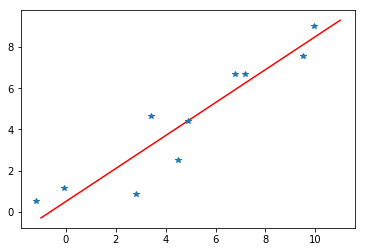

In [35]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept #按照公式 Y = 截句

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')

# Great Job!